## SignGen เพิ่มขีดเส้นใต้ ##

In [3]:
from PIL import Image, ImageDraw, ImageFont
import random
def signGen1(list_position, message, font_name, size): #list:list_position, message:str, font_name:str, size:int
    # init image size
    W = list_position[1] - list_position[0]
    H = list_position[3] - list_position[2]
    image_size = (W, H)
    # load font
    font = ImageFont.truetype(font_name, size)
    if font.getsize(message)[0] < W: # Normal Case
        # create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        #write text
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black')
        y = (image_size[1]-h)/2 + h  # กำหนดตำแหน่ง y ให้เริ่มที่ด้านล่างของข้อความ
        draw.line([(image_size[0]-w)/2, y, (image_size[0]+w)/2, y], fill='black', width=2) #เพิ่มขีดเส้นใต้
    else: # Case Text too long
        start_size = 1
        # create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        font = ImageFont.truetype(font_name, start_size)
        while font.getsize(message)[0] < W:
        # iterate until the text size is just larger than the criteria
            start_size += 1
            font = ImageFont.truetype(font_name, start_size)
        start_size -= 1
        font = ImageFont.truetype(font_name, start_size)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black') 
        y = (image_size[1]-h)/2 + h  # กำหนดตำแหน่ง y ให้เริ่มที่ด้านล่างของข้อความกรณี resize รูป
        draw.line([(image_size[0]-w)/2, y, (image_size[0]+w)/2, y], fill='black', width=2) #เพิ่มขีดเส้นใต้กรณี resize รูป
    image2 = image.convert('RGBA')
    # rotated image
    rot = image2.rotate(random.choice(range(-8,8)), expand=1)
    # a white image same size as rotated image
    fff = Image.new('RGBA', rot.size, (255,)*4)
    # create a composite image using the alpha layer of rot as a mask
    out = Image.composite(rot, fff, rot)
    
    left = (out.size[0] - font.getsize(message)[0])/2
    top = (out.size[1] - font.getsize(message)[1])/2
    right = (out.size[0] + font.getsize(message)[0])/2
    bottom = (out.size[1] + font.getsize(message)[1])/2
    
    out = out.crop((left, top-15, right, bottom+15))
    return {'image_obj':out,'bb':list_position,'text':message,}

C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\3431647870.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(message)[0] < W: # Normal Case
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\3431647870.py:43: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  left = (out.size[0] - font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\3431647870.py:44: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  top = (out.size[1] - font.getsize(message)[1])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\3431647870.py:45: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  right = (out.size[0] + font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\i

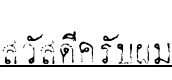

In [4]:
out= signGen1([0,200,0,200], 'สวัสดีครับผม','./handwriting/th/SOV_MuekMod.ttf', 50)
out['image_obj']

## SignGen เพิ่มขีดค่าเเบบสุ่ม ##

In [5]:
from PIL import Image, ImageDraw, ImageFont
import random
def signGen3(list_position, message, font_name, size): #list:list_position, message:str, font_name:str, size:int
    # init image size
    W = list_position[1] - list_position[0]
    H = list_position[3] - list_position[2]
    image_size = (W, H)
    # load font
    font = ImageFont.truetype(font_name, size)
    if font.getsize(message)[0] < W: # Normal Case
        # create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black')
        #write text
        y = (image_size[1]-h)//2 + h  # กำหนดตำแหน่ง y ให้เริ่มที่ด้านล่างของข้อความ
        y_offset = random.randint(-10, 5)  # เพิ่มการสุ่มของเส้นใต้
        draw.line([(image_size[0]-w)//2, y + y_offset, (image_size[0]+w)//2, y + y_offset], fill='black', width=2)  # เพิ่มเส้นใต้ข้อความ
    else: # Case Text too long
        start_size = 1
        # create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        font = ImageFont.truetype(font_name, start_size)
        while font.getsize(message)[0] < W:
        # iterate until the text size is just larger than the criteria
            start_size += 1
            font = ImageFont.truetype(font_name, start_size)
        start_size -= 1
        font = ImageFont.truetype(font_name, start_size)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black') 
        y = (image_size[1]-h)//2 + h  # กำหนดตำแหน่ง y ให้เริ่มที่ด้านล่างของข้อความกรณี resize รูป
        y_offset = random.randint(-10, 5)  # เพิ่มการสุ่มของเส้นใต้กรณี resize รูป
        draw.line([(image_size[0]-w)//2, y + y_offset, (image_size[0]+w)//2, y + y_offset], fill='black', width=2)
    image2 = image.convert('RGBA')
    # rotated image
    rot = image2.rotate(random.choice(range(-8,8)), expand=1)
    # a white image same size as rotated image
    fff = Image.new('RGBA', rot.size, (255,)*4)
    # create a composite image using the alpha layer of rot as a mask
    out = Image.composite(rot, fff, rot)
    
    left = (out.size[0] - font.getsize(message)[0])/2
    top = (out.size[1] - font.getsize(message)[1])/2
    right = (out.size[0] + font.getsize(message)[0])/2
    bottom = (out.size[1] + font.getsize(message)[1])/2
    
    out = out.crop((left, top-15, right, bottom+15))
    return {'image_obj':out,'bb':list_position,'text':message,}

C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\1764041613.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(message)[0] < W: # Normal Case
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\1764041613.py:26: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  while font.getsize(message)[0] < W:
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\1764041613.py:45: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  left = (out.size[0] - font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\1764041613.py:46: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  top = (out.size[1] - font.getsize(message)[1])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_7616\1

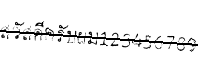

In [6]:
out= signGen3([0,200,0,200], 'สวัสดีครับผม123456789','./handwriting/th/SOV_MuekMod.ttf', 50)
out['image_obj']

## SignGen เพิ่มเส้นปะใต้คำ ##

In [139]:
from PIL import Image, ImageDraw, ImageFont
import random

def signGen4(list_position, message, font_name, size): 
    # Initiate image size
    W = list_position[1] - list_position[0]
    H = list_position[3] - list_position[2]
    image_size = (W, H)
    
    # Load font
    font = ImageFont.truetype(font_name, size)
    if font.getsize(message)[0] < W: # Normal Case
        # Create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        templates = [".", "-", "_"]
        selected_template = random.choice(templates)
        if selected_template == "_":
            distance = -30
        elif selected_template == ".":
            distance = -25
        else:
            distance = -20
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black') # Write text
        draw.text(((image_size[0] - w) / 2, (image_size[1] + h + distance - h) / 2), selected_template*len(message), font=font, fill='black')
    else: # Case Text too long
        start_size = 1
        # Create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        font = ImageFont.truetype(font_name, start_size)
        while font.getsize(message)[0] < W:
            # Iterate until the text size is just larger than the criteria
            start_size += 1
            font = ImageFont.truetype(font_name, start_size)
        start_size -= 1
        font = ImageFont.truetype(font_name, start_size)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        templates = [".", "-", "_"]
        selected_template = random.choice(templates)
        if selected_template == "_":
            distance = -30
        elif selected_template == ".":
            distance = -25
        else:
            distance = -20
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black')
        draw.text(((image_size[0] - w) / 2, (image_size[1] + h + distance - h) / 2), selected_template*len(message), font=font, fill='black')
    image2 = image.convert('RGBA')
    # Rotated image
    rot = image2.rotate(random.choice(range(-8,8)), expand=1)
    # A white image same size as rotated image
    fff = Image.new('RGBA', rot.size, (255,)*4)
    # Create a composite image using the alpha layer of rot as a mask
    out = Image.composite(rot, fff, rot)
    
    left = (out.size[0] - font.getsize(message)[0])/2
    top = (out.size[1] - font.getsize(message)[1])/2
    right = (out.size[0] + font.getsize(message)[0])/2
    bottom = (out.size[1] + font.getsize(message)[1])/2
    
    out = out.crop((left, top-15, right, bottom+15))
    return {'image_obj':out,'bb':list_position,'text':message}


C:\Users\alizw\AppData\Local\Temp\ipykernel_6968\951693330.py:12: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(message)[0] < W: # Normal Case
C:\Users\alizw\AppData\Local\Temp\ipykernel_6968\951693330.py:58: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  left = (out.size[0] - font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_6968\951693330.py:59: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  top = (out.size[1] - font.getsize(message)[1])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_6968\951693330.py:60: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  right = (out.size[0] + font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\ipyke

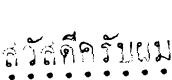

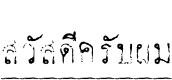

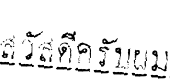

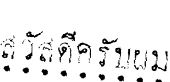

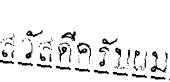

In [144]:
num_images = 5

for i in range(num_images):
    out = signGen4([0,300,0,300], 'สวัสดีครับผม','./handwriting/th/SOV_MuekMod.ttf', 50)
    display(out['image_obj'])